# Execute the code below

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link).iloc[:,[0, 1, 2, -3]]

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

# You have now a DataFrame with weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,OPINION
0,2019-01-01,9,4,very bad
1,2019-01-02,8,5,very bad
2,2019-01-03,6,0,very bad
3,2019-01-04,5,-1,very bad
4,2019-01-05,6,-1,very bad


# Now, complete the following tasks :

## ScatterPlot with 2 variables, title and legend
First of all, you have to create a scatterplot with MAX (in red) and MIN (in blue) Temperatures on the same graph

X-axis stay "DATE" for both values

You have to add title and legend

Here is an example of what is expected :

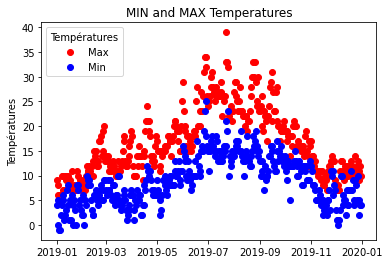

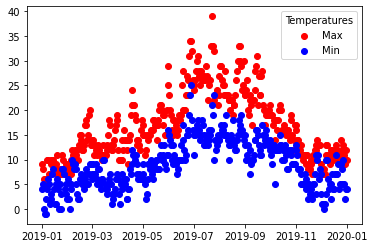

In [ ]:
# Complete the code below :

plt.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red', label = "Max" )
plt.scatter(  x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label = "Min"  ) #You have to complete this code. You could probably try to copy the previous line, and change max temperature by min temperature ?
plt.legend(title="Temperatures")
plt.show()


## 2 charts on the same figure
Now, complete this code to have MAX and MIN Temperature in 2 charts, MAX on the left side and MIN on the right side 

The X axis have to be the date of the year

Each graph must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

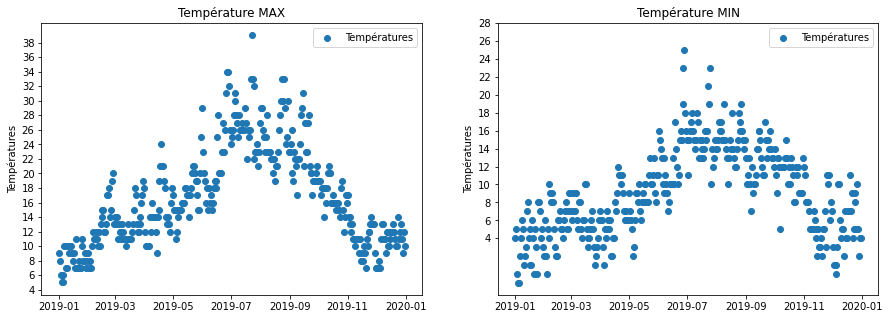

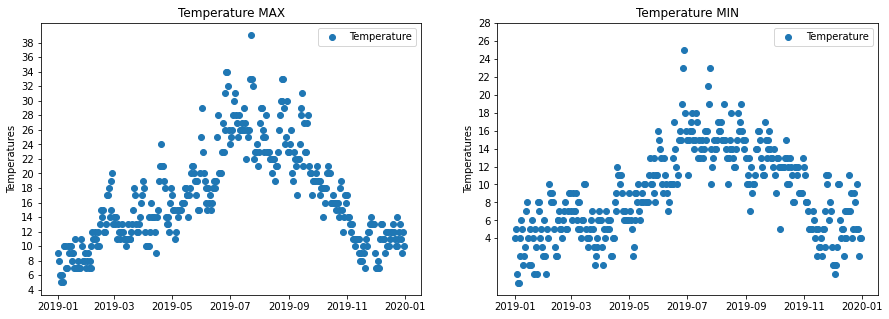

In [21]:
# Complete the code below :
fig, ax = plt.subplots(figsize = (15,5)) # fig is the global figure, which contains 2 subplots here (ax1 and ax2)

ax1 = plt.subplot(122) # 211 ? What does it mean ? "2" for 2 lines, "1" for 1 column and "1" for the first chart, you can change it
ax1.scatter(y = df_weather['MIN_TEMPERATURE_C'], x = df_weather["DATE"], label = "Temperature")
ax1.yaxis.set_ticks(range(4,30,2))
ax1.set_title("Temperature MIN")
ax1.legend()
plt.ylabel('Temperatures')

ax2 = plt.subplot(121)
ax2.scatter(y = df_weather['MAX_TEMPERATURE_C'], x  = df_weather["DATE"], label = "Temperature")
ax2.yaxis.set_ticks(range(4,40,2)) #Hey, look at this ! I just modified the scale and the ticks with only one line !
ax2.set_title("Temperature MAX")
plt.legend()
plt.ylabel('Temperatures')

plt.show()

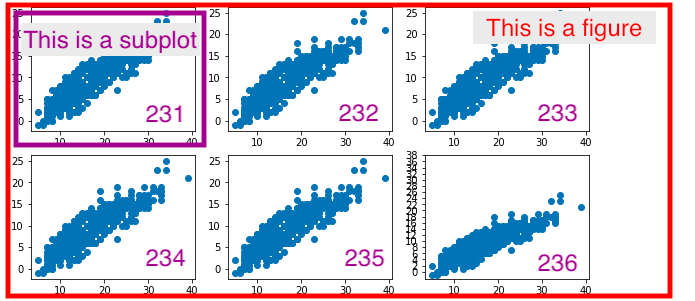

## and 4 charts now !
Now, you have to show a figure with 4 subplots :
- For the top left one : scatterplot with MAX (in red) and MIN (in blue) Temperatures (Y-axis), and date on X-axis
- For the top right one : a pie-chart with frequencies of opinions. Could you "explode" the "very good" part ?
- For the bottom left one : a zoom on january, with MAX Temperatures on a column chart (bar), and MIN temperature on a curve (plot). Date on X-axis.
- For the bottom right one : an histogram of MAX Temperature

Each chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

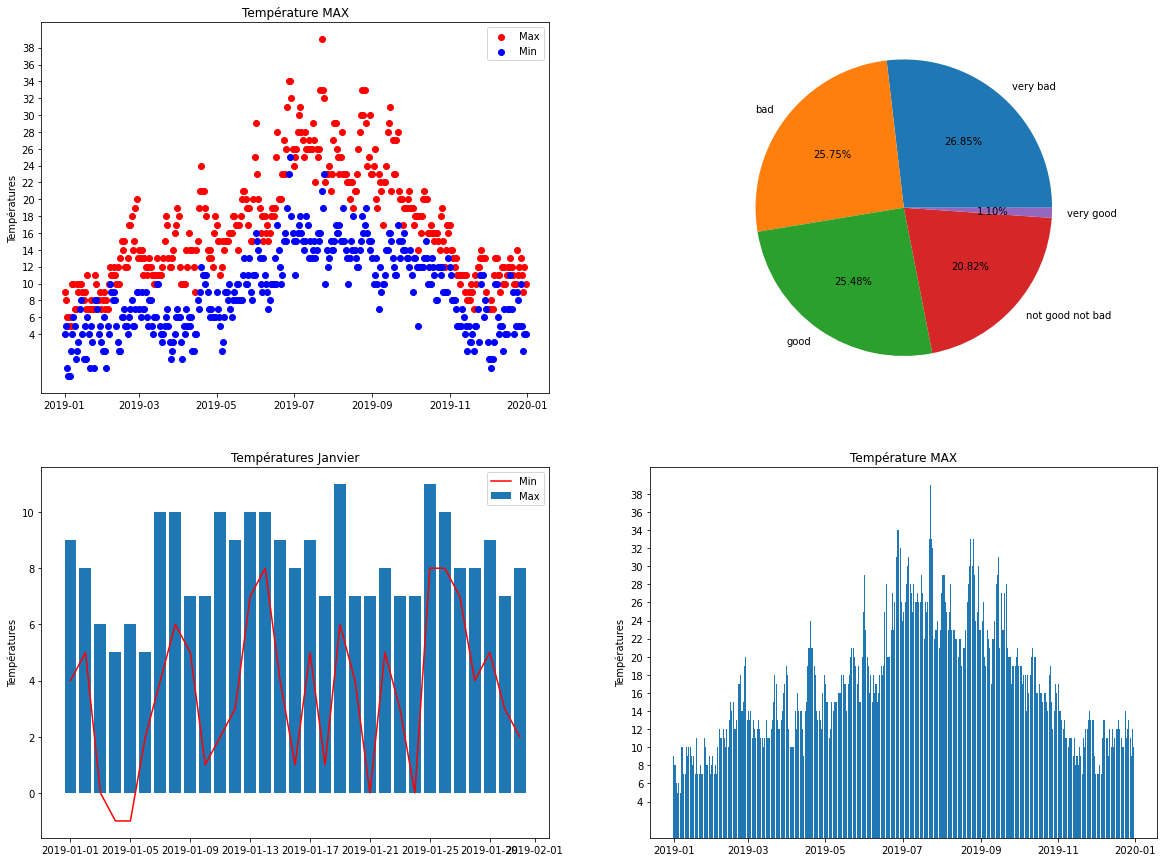

In [ ]:
# Complete the code below :
df_weather['OPINION'].value_counts() # Hey, value_counts() seems a good method for the pie. How can I use it ?

very bad            98
bad                 94
good                93
not good not bad    76
very good            4
Name: OPINION, dtype: int64

## Last but not least

We would know if Opinion is a good indicator.
Could you draw 1 scatterplot with :
- DATE on X-axis
- MAX Temperature on Y-axis
- Colorize in green the good and very good points
- Colorize in red the bad and very bad points
- Colorize in yellow the not good not bad points

Tips : index can help you to sort the date correctly

The chart must have a title, a legend for the colors, and of course, readable axis (ticks)

Here is an example of what is expected :

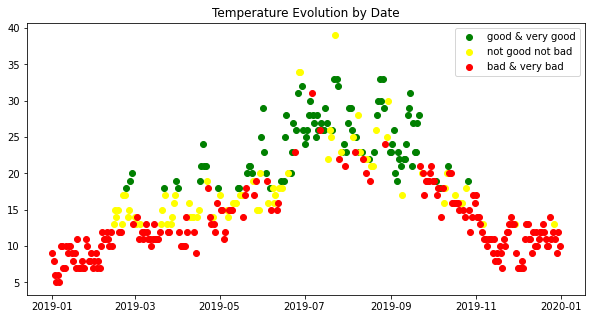

No handles with labels found to put in legend.


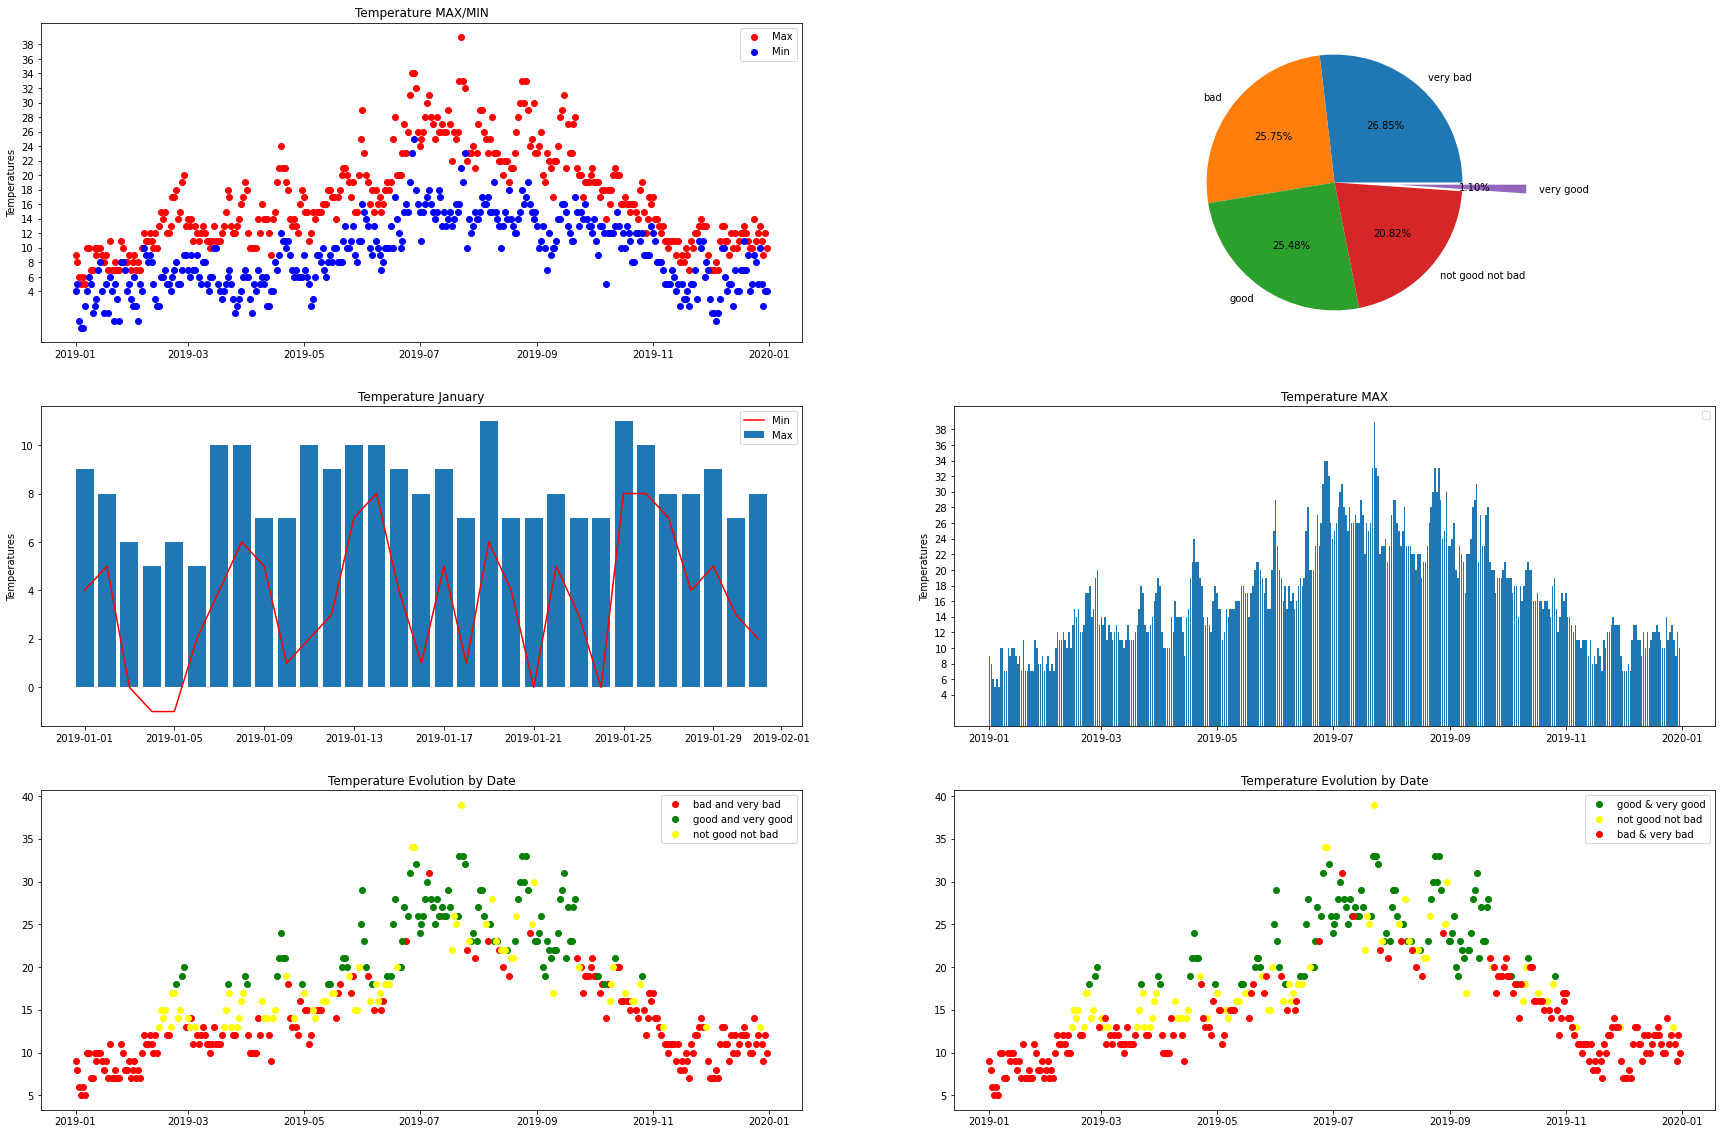

In [ ]:
# It's your turn now :
fig, ax = plt.subplots(figsize = (30,20)) # fig is the global figure, which contains 2 subplots here (ax1 and ax2)

ax1_1 = plt.subplot(321) 
ax1_1.scatter(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], c= 'red', label = "Max" )
ax1_1.scatter(  x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], c= 'blue', label = "Min"  )
ax1_1.yaxis.set_ticks(range(4,30,2))
ax1_1.set_title("Temperature MAX/MIN")
ax1_1.yaxis.set_ticks(range(4,40,2))
plt.ylabel('Temperatures')
ax1_1.legend()



ax1_2 = plt.subplot(322)
ax1_2.pie(df_weather['OPINION'].value_counts(normalize=True) * 100, labels=df_weather['OPINION'].value_counts(normalize=True).index, autopct='%1.2f%%', explode = (0, 0, 0, 0,0.5))


df_weather['OPINION']

ax2_1 = plt.subplot(323)
ax2_1.bar(x=df_weather['DATE'][df_weather['DATE'].dt.month == 1 ], height= df_weather['MAX_TEMPERATURE_C'][df_weather['DATE'].dt.month == 1 ] , label='Max')
ax2_1.plot(df_weather['DATE'][df_weather['DATE'].dt.month == 1 ], df_weather['MIN_TEMPERATURE_C'][df_weather['DATE'].dt.month == 1 ], color = 'r', label='Min')
ax2_1.yaxis.set_ticks(range(0,12,2)) 
ax2_1.set_title("Temperature January")
plt.ylabel('Temperatures')
plt.legend()

ax2_2 = plt.subplot(324)
ax2_2.bar(height= df_weather['MAX_TEMPERATURE_C'], x = df_weather['DATE'])   # Der original Grafik bin ich nur so nahgekommen .. nicht mit hist(), bin auf eure Lösungen gespannt. 
ax2_2.yaxis.set_ticks(range(4,40,2)) 
ax2_2.set_title("Temperature MAX")
plt.ylabel('Temperatures')
plt.legend()

ax3 = plt.subplot(325)
c_l_map= {'bad':('bad and very bad','red'),
             'very bad':('bad and very bad','red'),
             'not good not bad':('not good not bad','yellow'),
             'good':('good and very good','green'),
             'very good':('good and very good','green')}

df_weather[['MAX_TEMPERATURE_C','DATE','OPINION']]. \
  assign(C_L_M=df_weather['OPINION'].map(c_l_map)). \
  groupby('C_L_M').apply(lambda grp : ax3.scatter(x=grp.DATE, y=grp['MAX_TEMPERATURE_C'], label=grp.C_L_M.values[0][0], c=grp.C_L_M.values[0][1] ))
ax3.yaxis.set_ticks(range(5,45,5)) 
ax3.set_title("Temperature Evolution by Date")
plt.legend()




#Alternativ Lösung: 

df_bad = df_weather.loc[df_weather['OPINION'].isin(['bad', 'very bad'])]
df_ok = df_weather[df_weather['OPINION'] == 'not good not bad']
df_good = df_weather.loc[df_weather['OPINION'].isin(['good', 'very good'])]

ax3_2 = plt.subplot(326)
ax3_2.scatter(x = df_good["DATE"], y = df_good["MAX_TEMPERATURE_C"], c= 'green', label='good & very good')
ax3_2.scatter(x = df_ok["DATE"], y = df_ok["MAX_TEMPERATURE_C"], c= 'yellow', label='not good not bad')
ax3_2.scatter(x = df_bad["DATE"], y = df_bad["MAX_TEMPERATURE_C"], c= 'red', label='bad & very bad')
ax3_2.yaxis.set_ticks(range(5,45,5)) 
ax3_2.set_title("Temperature Evolution by Date")
plt.legend()


plt.show()

